<a href="https://colab.research.google.com/github/Sudharsan72692/Heart-attack-prediction/blob/main/Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


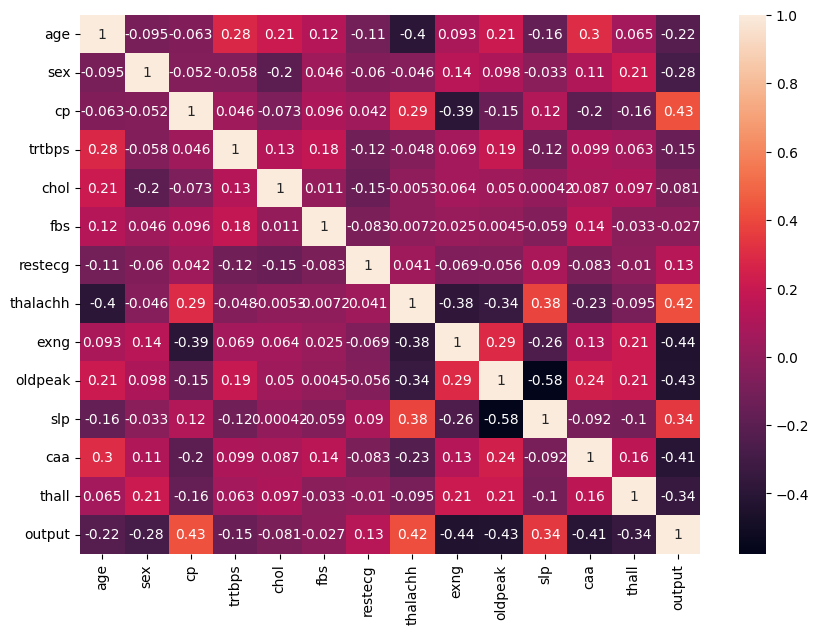

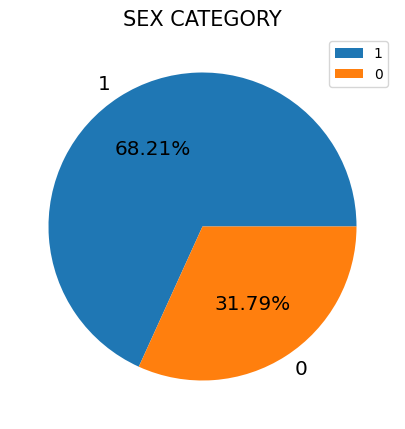

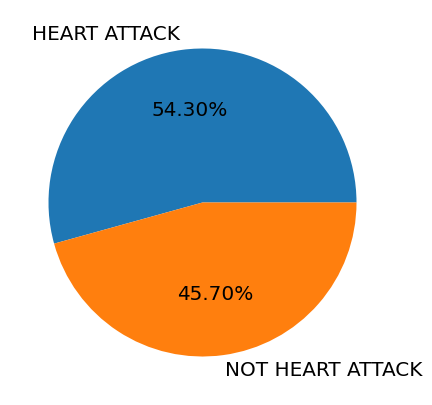

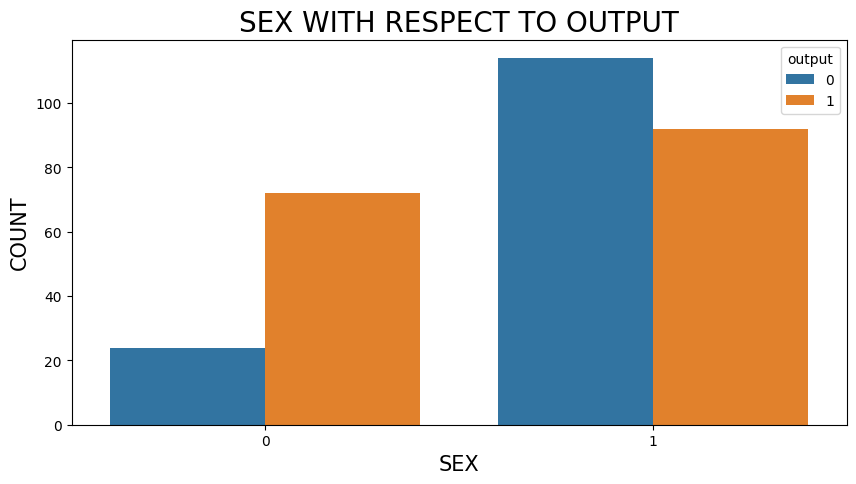

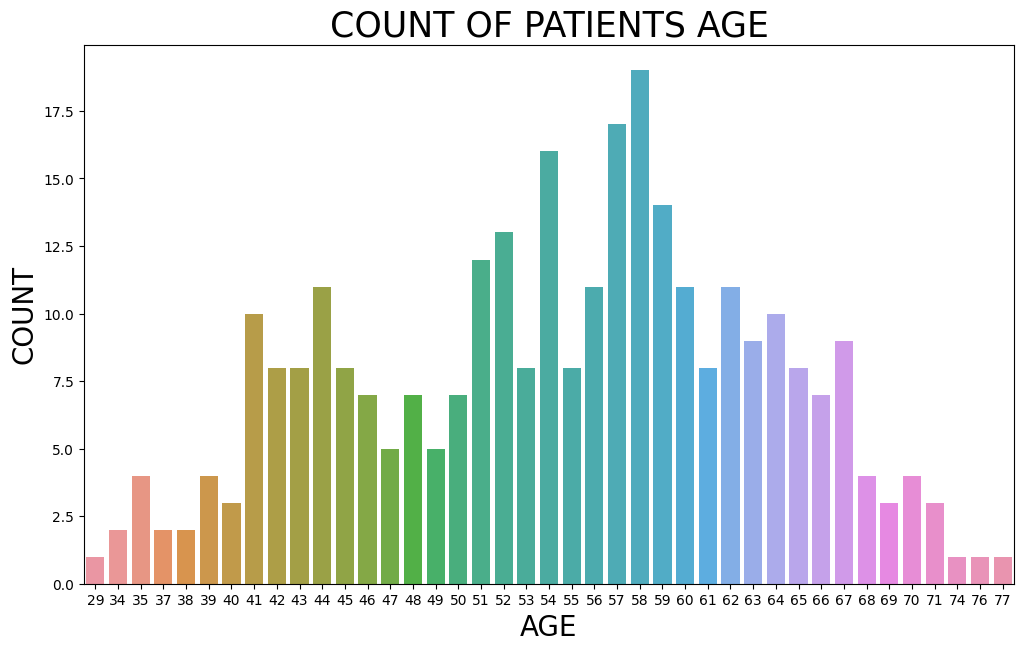

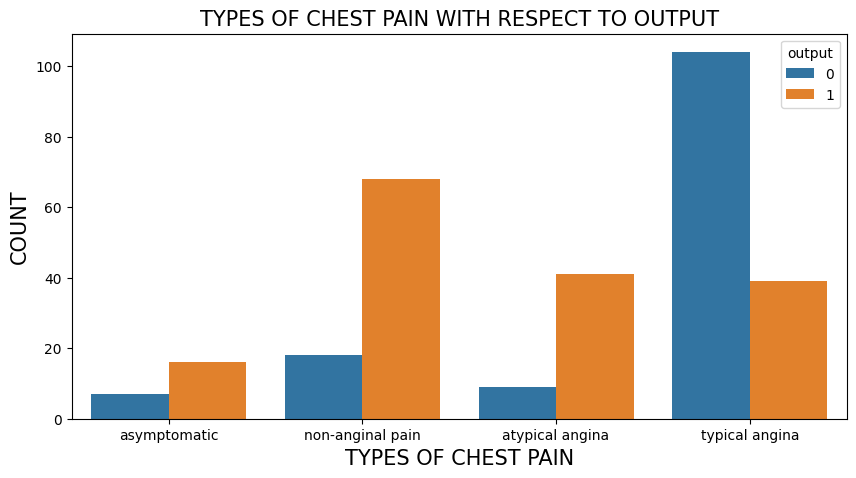

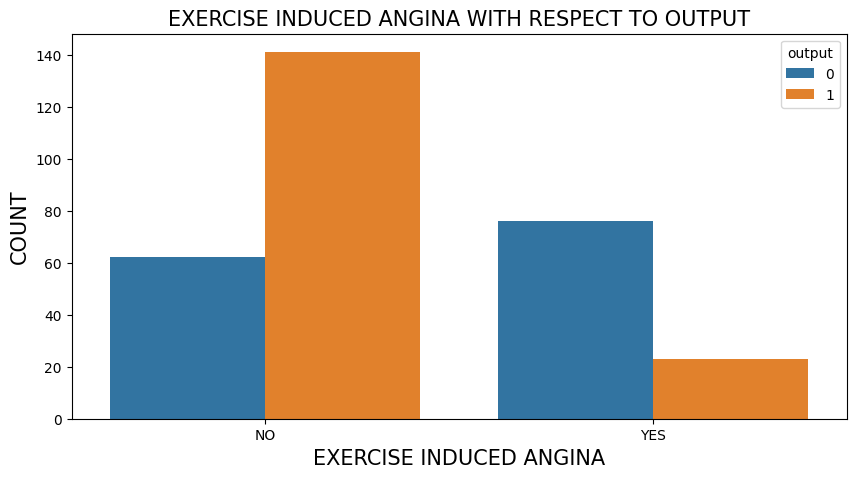

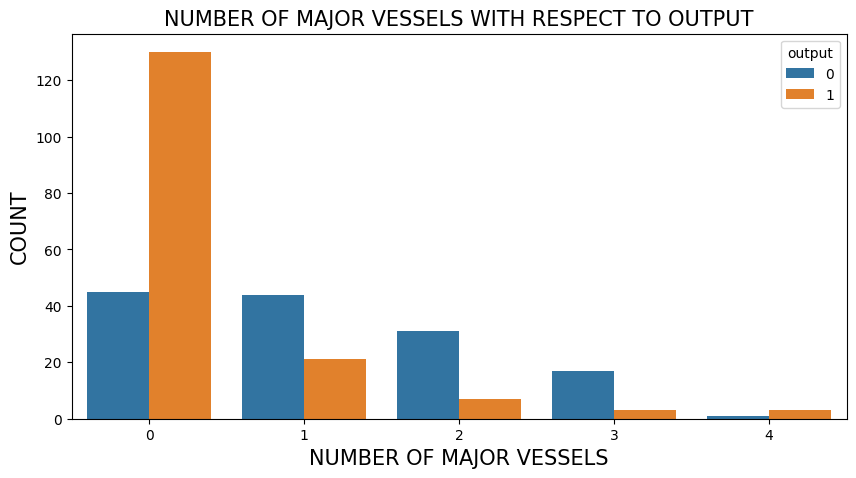

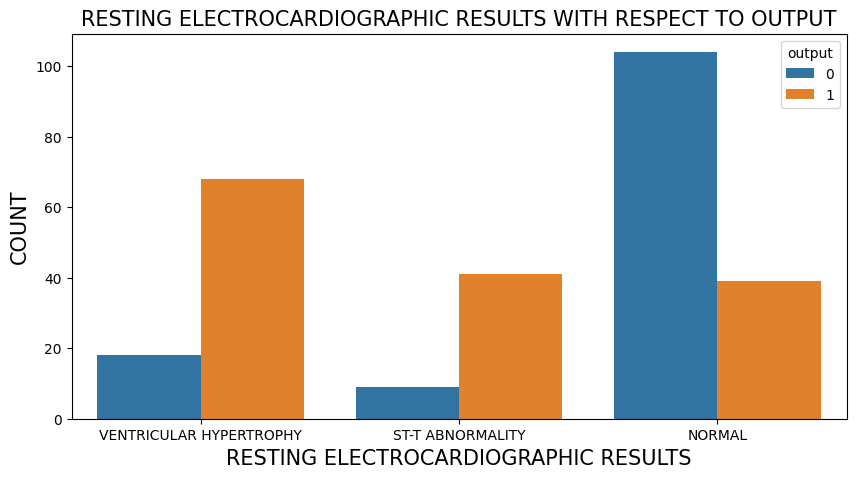

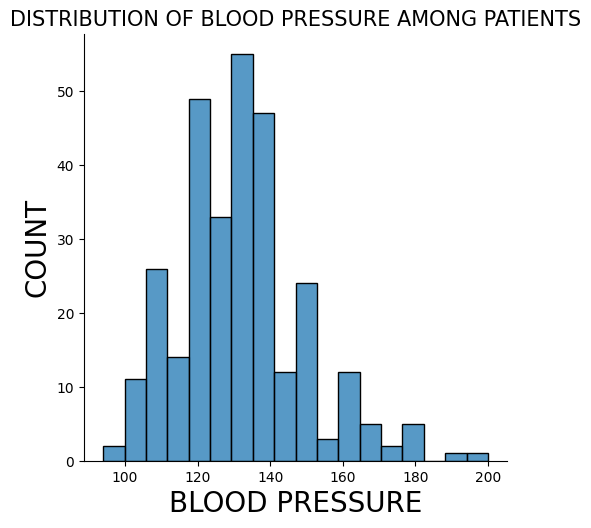

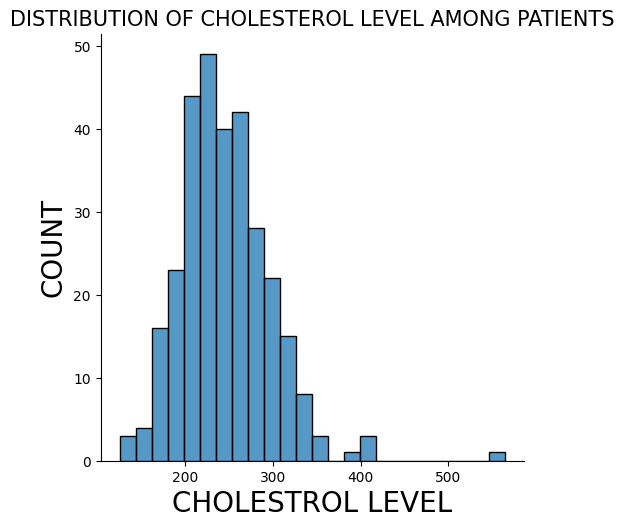

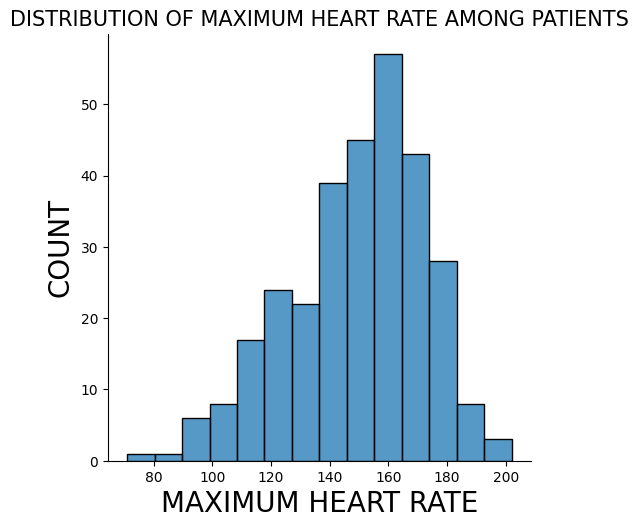

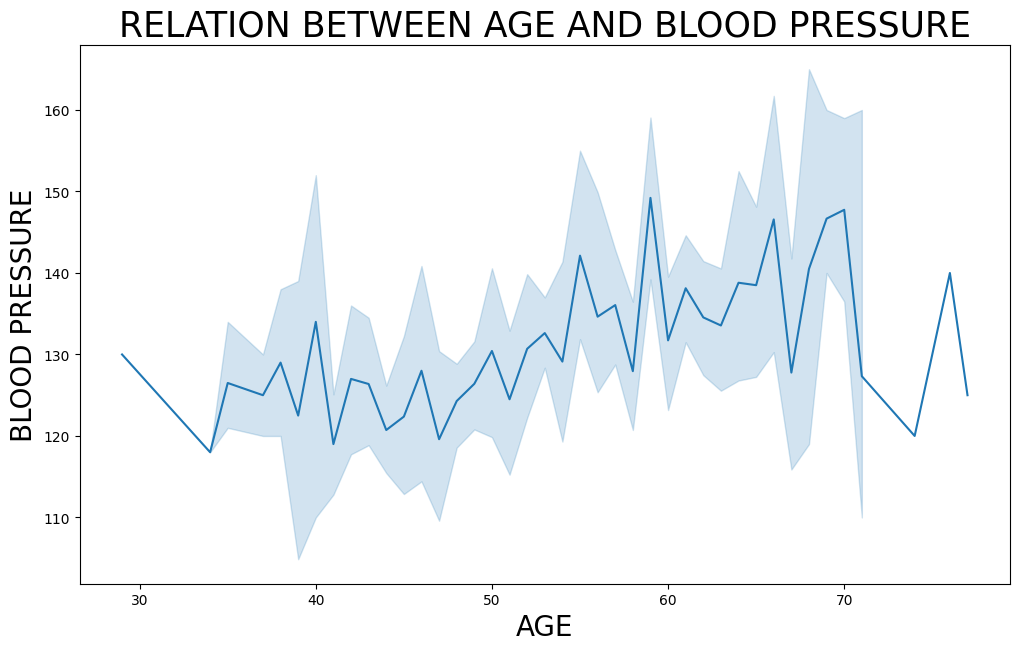

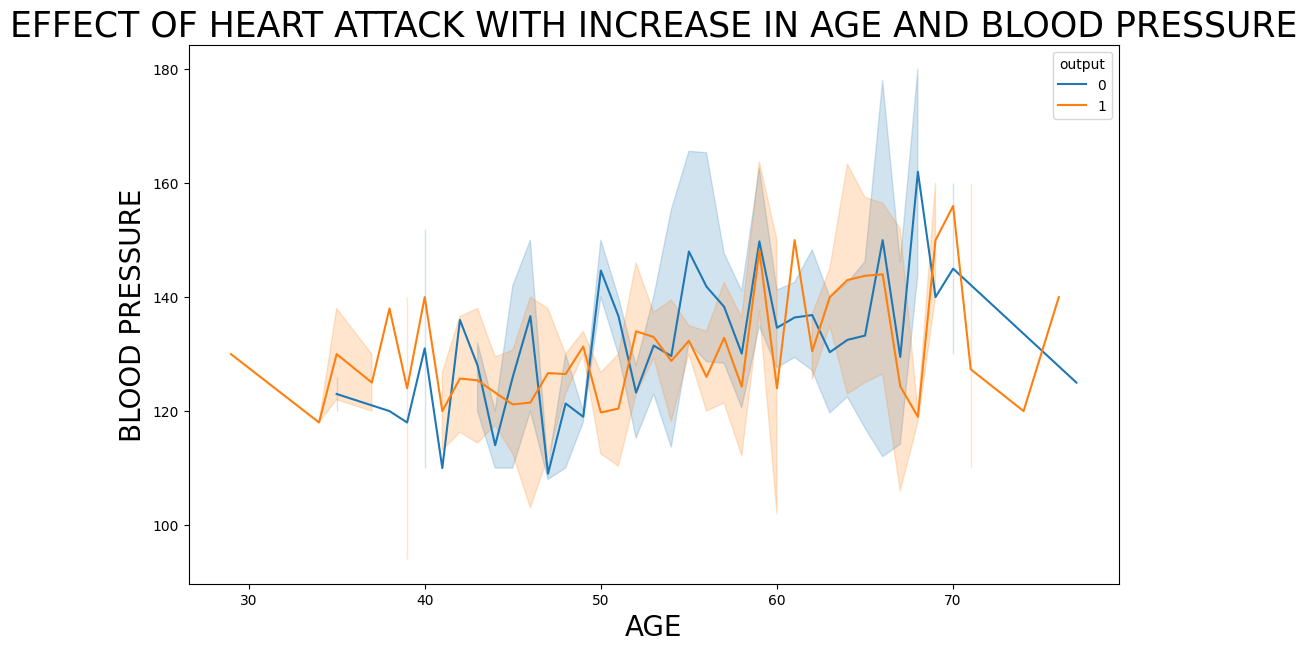

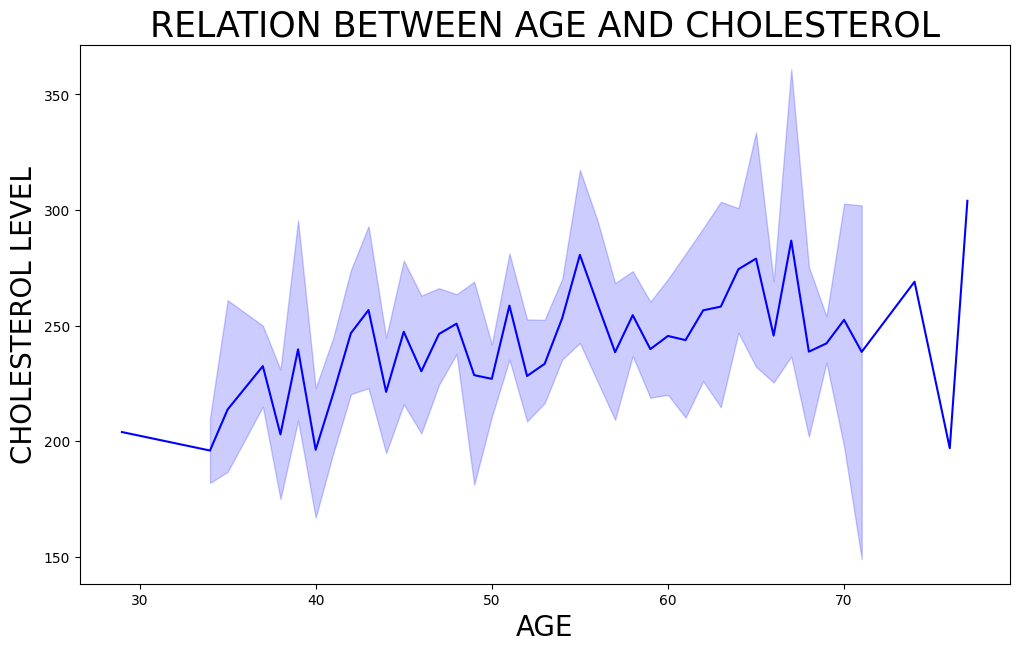

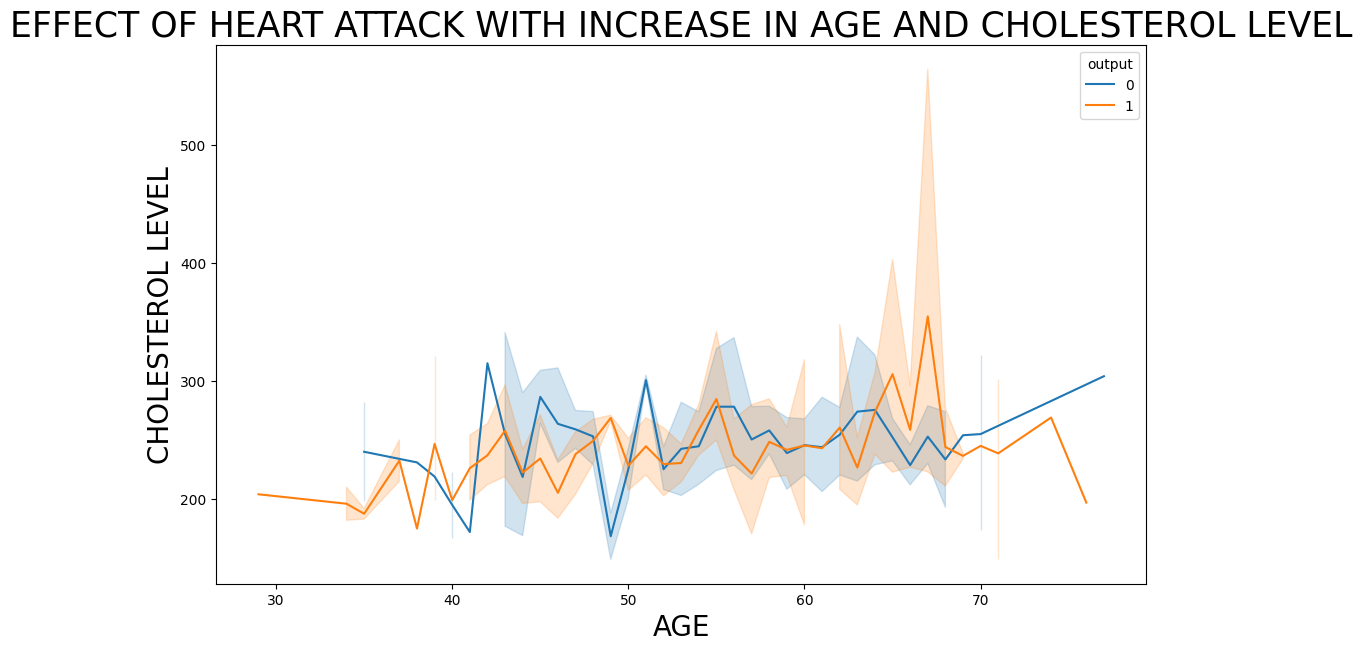

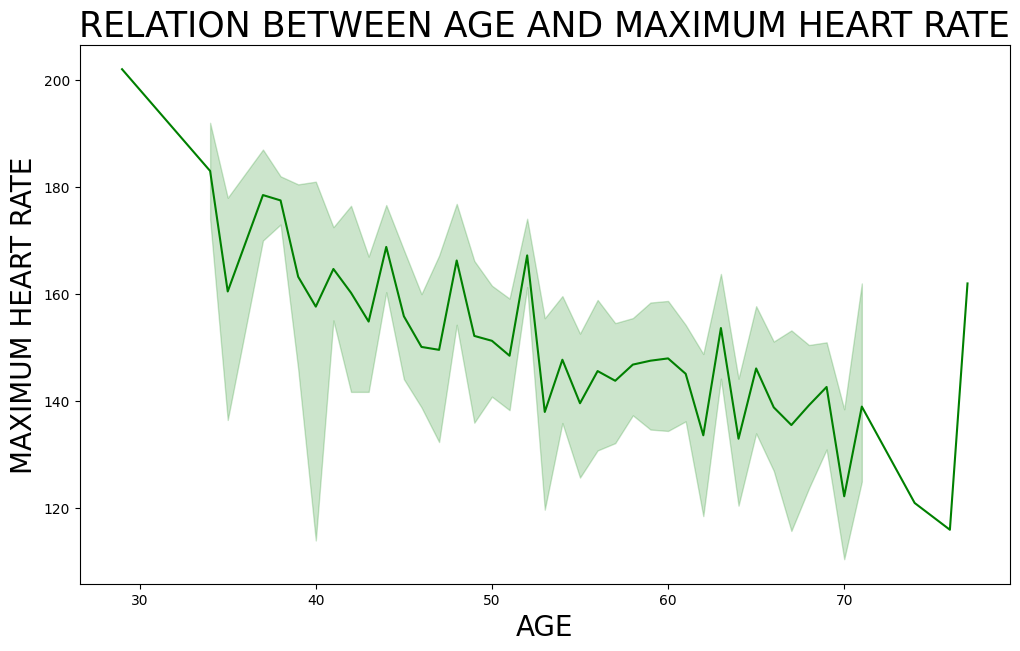

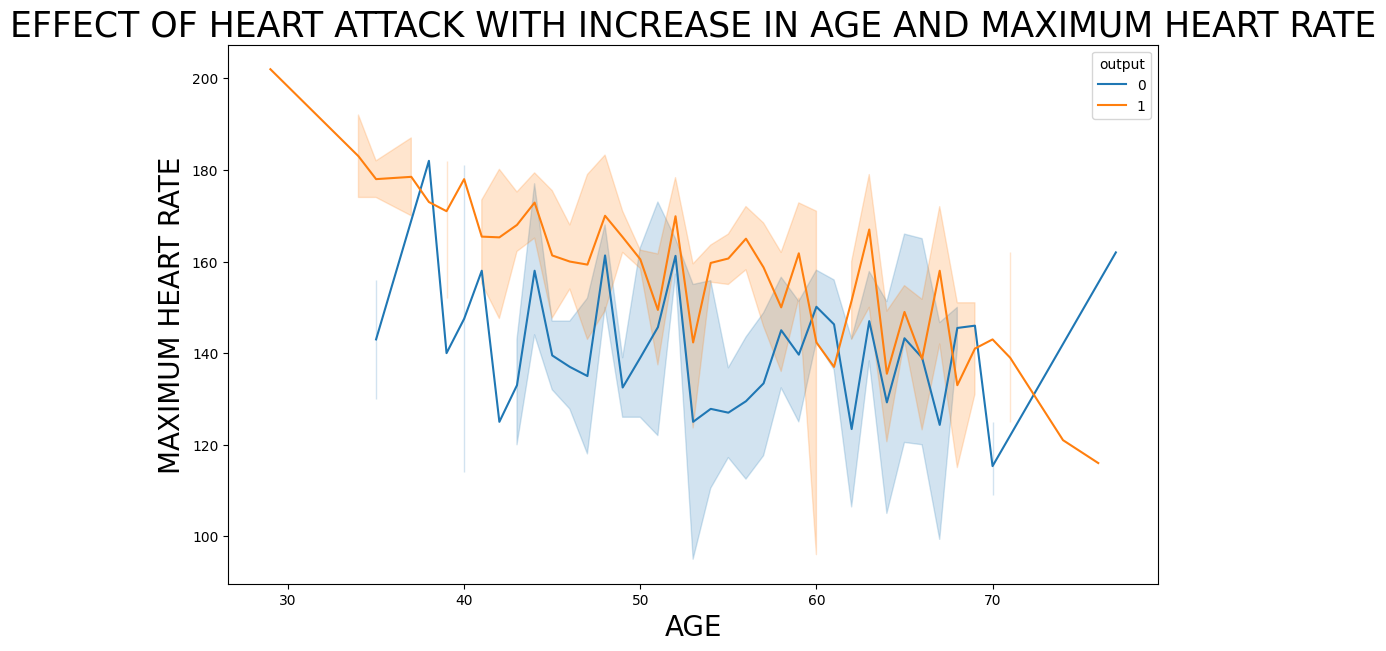

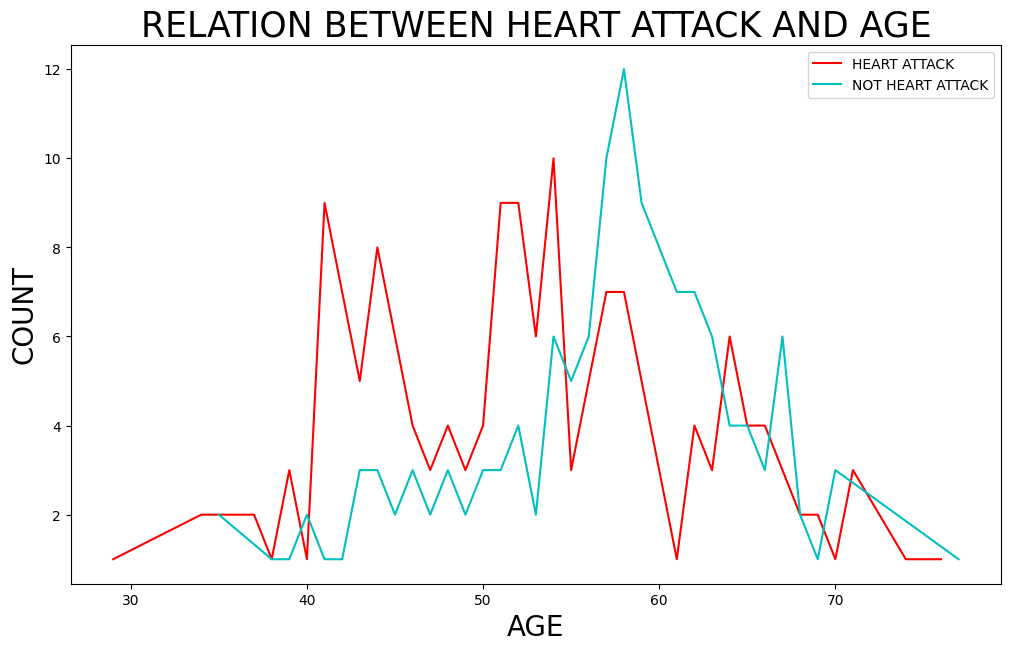

Confusion matrix : 
[[27  9]
 [ 5 35]]
Accuracy score:  0.8157894736842105
Precision score:  0.7954545454545454
Recall score:  0.875
F1 score:  0.8333333333333334


In [1]:
# Imports libraries
import pandas as pd
import numpy as np
# Imports dataset
df= pd.read_csv('heart.csv')
# Shape of dataframe
df.shape
# Concise summery of dataframe
df.info()
# Statistics of dataframe
df.describe()
# Pairwise correlation of all columns in dataframe
df.corr()
# Checking for duplicates
df.duplicated().sum()
# View duplicate
df.loc[df.duplicated()]
df.loc[163:164]
# Drops duplicates
df= df.drop_duplicates()
# Sets the indices in order
df= df.reset_index(drop=True)
df.loc[163:164]
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap of the correlation
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()
plt.figure(figsize=(10,5))
plt.pie(pd.value_counts(df.sex),labels=[1,0],autopct='%.2f%%',textprops={'size':'x-large'})
plt.title('SEX CATEGORY',fontsize=15)
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.pie(pd.value_counts(df.output),labels=['HEART ATTACK','NOT HEART ATTACK'],autopct='%.2f%%',textprops={'size':'x-large'})
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue='output',data=df)
plt.title('SEX WITH RESPECT TO OUTPUT',fontsize=20)
plt.xlabel('SEX',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.show()
plt.figure(figsize=(12,7))
sns.countplot(x='age',data=df)
plt.title('COUNT OF PATIENTS AGE',fontsize=25)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()
plt.figure(figsize=(10,5))
chest_pain=df.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sns.countplot(x=chest_pain,hue='output',data=df)
plt.xlabel('TYPES OF CHEST PAIN',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('TYPES OF CHEST PAIN WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()
plt.figure(figsize=(10,5))
exng_data=df.exng.map({0:'NO',1:'YES'})
sns.countplot(x=exng_data,hue='output',data=df)
plt.xlabel('EXERCISE INDUCED ANGINA',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('EXERCISE INDUCED ANGINA WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(x='caa',hue='output',data=df)
plt.xlabel('NUMBER OF MAJOR VESSELS',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('NUMBER OF MAJOR VESSELS WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()
plt.figure(figsize=(10,5))
rest_ecg_data=df.cp.map({0:'NORMAL',1:'ST-T ABNORMALITY',2:'VENTRICULAR HYPERTROPHY'})
sns.countplot(x=rest_ecg_data,hue='output',data=df)
plt.xlabel('RESTING ELECTROCARDIOGRAPHIC RESULTS',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('RESTING ELECTROCARDIOGRAPHIC RESULTS WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()
sns.displot(x='trtbps',data=df)
plt.title('DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS',fontsize=15)
plt.xlabel('BLOOD PRESSURE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()
sns.displot(x='chol',data=df)
plt.title('DISTRIBUTION OF CHOLESTEROL LEVEL AMONG PATIENTS',fontsize=15)
plt.xlabel('CHOLESTROL LEVEL',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()
sns.displot(x='thalachh',data=df)
plt.title('DISTRIBUTION OF MAXIMUM HEART RATE AMONG PATIENTS',fontsize=15)
plt.xlabel('MAXIMUM HEART RATE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='trtbps',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='trtbps',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',color='blue',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('RELATION BETWEEN AGE AND CHOLESTEROL',fontsize=25)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTEROL LEVEL',fontsize=25)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',color='green',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()
no= df[df['output']==0]['age'].value_counts().sort_index(ascending=True)
yes= df[df['output']==1]['age'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(12,7))
plt.plot(yes,c='r',label='HEART ATTACK')
plt.plot(no,c='c',label='NOT HEART ATTACK')
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.title('RELATION BETWEEN HEART ATTACK AND AGE',fontsize=25)
plt.legend()
plt.show()
# Reordering the columns for easier feature scaling
df=df[['age','trtbps','chol','thalachh','oldpeak','sex','cp','fbs','restecg','exng','slp','caa','thall','output']]
# Create feature matrix X and dependent vector Y
X= df.iloc[:,:-1].values
Y= df.iloc[:,-1].values
# Applying Feature Scaling to 'age','trtbps','chol','thalachh','oldpeak'
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,0:5]=sc.fit_transform(X[:,0:5])
# Spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.25,random_state=1)
# Training the model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000)
lr.fit(Xtrain,Ytrain)
#Testing the model
Ypredicted= lr.predict(Xtest)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Ytest,Ypredicted)
print('Confusion matrix : ')
print(cm)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: ',accuracy_score(Ytest,Ypredicted))
print('Precision score: ',precision_score(Ytest,Ypredicted))
print('Recall score: ',recall_score(Ytest,Ypredicted))
print('F1 score: ',f1_score(Ytest,Ypredicted))
